#### Generate diagram of shear zone property

In [1]:
import os, sys
import numpy as np
from shutil import rmtree, copy
from matplotlib import pyplot as plt
from matplotlib import gridspec, cm

# directory to the aspect Lab
ASPECT_LAB_DIR = os.environ['ASPECT_LAB_DIR']
TwoDSubduction_DIR = os.environ['TwoDSubduction_DIR']
RESULT_DIR = os.path.join(ASPECT_LAB_DIR, 'results')

sys.path.append(os.path.join(ASPECT_LAB_DIR))
from shilofue.TwoDSubduction0.Group import CASE_SUMMARY
import shilofue.TwoDSubduction0.VtkPp as TwoDVtkPp
from shilofue.Group import ReadBasicInfoGroup
from shilofue.TwoDSubduction0.PlotVisit import VISIT_OPTIONS

#### Generate the slab morphology at the shortest interval possible

First, run the following block.

Then, take the py_temp.sh file generated and:

    chmod +x py_temp.sh
    
    ./py_temp.sh

This would run in parallel and generate the slab_morph.txt files.

In [2]:
group_dir = os.path.join(TwoDSubduction_DIR, 'EBA_CDPT18')
time_interval = 0.1e6

# read the list of cases
case_list, _, _, _ = ReadBasicInfoGroup(group_dir)

# write a .sh file to run command in the system
py_temp_file = os.path.join(ASPECT_LAB_DIR, 'py_temp.sh')
py_commands = []

for _case in case_list:
  case_dir = os.path.join(group_dir, _case)
  py_command = "python -m shilofue.TwoDSubduction0.VtkPp morph_case_parallel -i %s -ti %.2e\n" % (case_dir, time_interval)
  py_commands.append(py_command)

with open(py_temp_file, 'w') as fout:
  fout.write("#!/bin/bash\n")
  for py_command in py_commands:
    fout.write(py_command)

/home/lochy/ASPECT_PROJECT/aspectLib/shilofue/PlotRunTime.py:93: FileHasNoContentWarning: func RunTimeInfo: There is no block data in file /mnt/lochy0/ASPECT_DATA/TwoDSubduction/EBA_CDPT18/eba_cdpt_coh500_SA80.0_OA40.0_cd150.0_cd5.0_gr9/output/log.txt, Do nothing
  warnings.warn(warning_message, Utilities.WarningTypes.FileHasNoContentWarning)
/home/lochy/ASPECT_PROJECT/aspectLib/shilofue/PlotRunTime.py:93: FileHasNoContentWarning: func RunTimeInfo: There is no block data in file /mnt/lochy0/ASPECT_DATA/TwoDSubduction/EBA_CDPT18/eba_cdpt_coh500_SA80.0_OA40.0_cd100.0_cd5.0_gr9/output/log.txt, Do nothing
  warnings.warn(warning_message, Utilities.WarningTypes.FileHasNoContentWarning)


#### Write to a summary file

write_file_if_update: File already exists /mnt/lochy0/ASPECT_DATA/TwoDSubduction/EBA_CDPT18/case_summary.txt


/home/lochy/ASPECT_PROJECT/aspectLib/shilofue/Group.py:825: RuntimeWarning: divide by zero encountered in true_divide
  weight += 1.0 / dist
/home/lochy/ASPECT_PROJECT/aspectLib/shilofue/Group.py:826: RuntimeWarning: divide by zero encountered in true_divide
  ZZ += Zs[i] / dist
/home/lochy/ASPECT_PROJECT/aspectLib/shilofue/Group.py:827: RuntimeWarning: invalid value encountered in true_divide
  ZZ /= weight


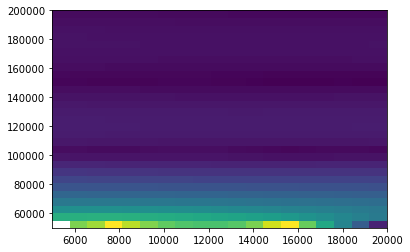

In [3]:
group_dir = os.path.join(TwoDSubduction_DIR, 'EBA_CDPT18')

o_path = os.path.join(TwoDSubduction_DIR, 'EBA_CDPT18', 'case_summary.txt')

fig_t660_path = os.path.join(group_dir, 'img', 't660s.png')
if not os.path.isdir(os.path.dirname(fig_t660_path)):
  os.mkdir(os.path.dirname(fig_t660_path))

Case_Summary = CASE_SUMMARY(VISIT_OPTIONS=VISIT_OPTIONS)

# Either read an existing summary or import a directory (a group of cases) and create one
# if os.path.isfile(o_path):
#    Case_Summary.import_txt(o_path)
# else:
# Case_Summary.import_directory(group_dir, actions=['t660', 'shear_zone'])
Case_Summary(group_dir, actions=['t660', 'shear_zone'])

# todo_diagram
Case_Summary.write_file_if_update(o_path)

# plot the t660 diagram
Case_Summary.plot_diagram_t660(fig_path=fig_t660_path)

In [4]:
%debug

ERROR:root:No traceback has been produced, nothing to debug.
